<div style='background-image: url("../../share/images/header.svg") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 250px'>
    <div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.7) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">Seismic Inverse Problems</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Probabilistic estimation of earthquake hypocenters</div>
        </div>
    </div>
</div>

##### Authors:
* Heiner Igel ([@heinerigel](https://github.com/heinerigel))
* Kilian Geßele ([@KGessele](https://github.com/KGessele))

---

## Estimation of a hypocenter


<img style="float: right; width: 420px" src="network.png"/>  
The arrival times of seismic waves contain important information on the earthquake properties.
By forming and solving a classical inverse problem based on the probabilistic inverse theory, we
can determine the hypocenter and the origin time of an earthquake using	the	arrival	times of seismic	waves.
This means that we are not interested in only one particular solution for our inverse problem, but all information we have on many possible solutions.  
In this exercise, for simplification purposes, we only look at a small network of four stations and concentrate on the two-dimensional case in Euclidean coordinates x and z (see first figure). The observations $\mathbf{d}_{obs}$ = {$t_1,t_2,t_3,t_4$} are the arrival times at the stations. The hypocenter location $X,Z$ and the origin time $T$ are the parameters of the unknown model $\mathbf{m}$ = {$X, Z, T$}. 



### Solution of the Forward Problem
For any arbitrary model, we can solve the forward problem using the following equation.

<img style="float: right; width: 340px; padding: 10px" src="geometry.png"/>

$$
\mathbf{d} = f(\mathbf{m})
$$

where the function $f$ describes the physical processes that associate the model $\mathbf{m}$ with the theoretical arrival times $\mathbf{d}$. In this exercise, we use a very simple geometrical concept and assume that the medium is homogeneous and the wave velocity $v$ is constant (see second figure). Therefore, the theoretical arrival time $t_i$ at one particular station location {$x_i, z_i$} for an arbitrary source {$X, Z, T$} is given by the following equation.


$$
t_i = f_i(X,Z,T) = T + \frac{\sqrt{(X - x_i)^2 + (Z - z_i)^2}}{v}
$$

If we consider a large computation power, we can simply calculate the theoretical arrival times for a large model space. However, we now want to include the probability theory to describe the state of information in this physical system.  





### A Priori Information on Model and Observations

All information obtained independently from the measurements is called a priori information. For the model parameters, this can be described by a probability density function (pdf) $\rho_m(X,Z,T)$. We assume that $\rho_m(X,Z,T)$ is constant for all model parameters within the interval of our interest. Mathematically, this could be described by a boxcar function, but in later calculations we set this value everywhere to one for simplification purposes. Since the observed arrival times contain uncertainties, we assume that all observations have independent, Gaussian uncertainties determined by the variance $\mathbf{\sigma}$ ={$\sigma_1, \sigma_2, \sigma_3,\sigma_4$}. The information on the observations can be described by a probability density function $\rho_d$ by including a normalization constant $k$.

$$
\rho_d(\mathbf{d}) = 
k\exp\Big(-\frac{1}{2} \sum_{i}\big(\frac{t_i - t_i^{obs}}{\sigma_i}\big)^2\Big)
$$  





### Solution of the Inverse Problem
Now we want to combine the a priori information with the information gained from the observations and the simple physical theory. The resulting a posteriori probability density function is the solution to the inverse problem. The final information on the model space is given by the marginal a posteriori probability density function $\sigma_m(X,Z,T)$. In our specific problem, we know the exact physical processes, hence we can precisely solve the forward problem. The only alteration of the inverse problem solution comes from the a priori information on model $\rho_m$ and observation parameters $\rho_d$.


$$
\sigma_m(X,Z,T) = k \; \rho_m(X,Z,T) \; \rho_d(t_1,t_2,t_3,t_4)\rvert_{t_i = f_i(X,Z,T)}
$$

This marginal a posteriori probability density function is calculated for a predefined modelspace in this notebook for hypocenter location and origin time.  





### Exercises:
    1. Run all cells and familiarize with the resulting plots.
    
    2. Investigate the influence of the controlling parameters (In cell "Set-up for data and model"):
            * Change the observation uncertainties
            * How do “outliers” affect the results? (large uncertainty for one or several observations)
            * How do additional stations at the surface change the solution?
            * What happens if all stations are located only on one side of the source?
            * How to improve the depth resolution?
            * What are the consequences when you change the increments in the model space?
            
    3. What would be the consequences when the calculation of the forward problem is much more complicated?
    
    4. What are the benefits and difficulties of using probabilistic inverse theory for solving the hypocenter problem?
    
    5. (Advanced) Extend the code to allow uncertainties in the velocity model:
            * Assume Gaussian uncertainty with a mean of 4.5 km/s and a variance of 1km/s
            * Add a variable "space_v" for model space exploration in the set-up cell
            * Change the size of "sigM" and add another loop for exploring "space_v"
            * Modify the calculation of the solution of the inverse problem "sigM"
            * Calculate and plot the marginal probability density function for velocity
            * Compare the solution with the a priori information

In [1]:
# This is a configuration step for the exercise
# ---------------------------------------------

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import NullFormatter

plt.style.use('ggplot')

In [2]:
# Set-up for data and model
#------------------------

# Define station coordinates             # (original values)
station_x = np.array([ 5,10,15,25])      # x(km) = [ 5,10,15,25]
station_z = np.array([ 0, 0, 0, 0])      # z(km) = [ 0, 0, 0, 0]

# Define uncertainties for the observed arrival time at each station
uncertain_t = np.array([.5, .2, .4, .2]) # uncertainties (s) = [.5,.2,.4,.2]

# Define earthquake source properties
source_x = 16                            # source location x (km) = 16
source_z = 15                            # source location z (km)= 15
origin_T = 17                            # origin time (s) = 17
v_exact  =  5                            # propagation velocity (km/s) = 5

# Model space for exploration: (lower bound, upper bound, increments)
space_x = np.arange( 0, 35, 0.5 )        # x-coordinate (km): ( 0, 35, 0.5 )
space_z = np.arange( 0, 25, 0.5 )        # z-coordinate (km): ( 0, 25, 0.5 )
space_T = np.arange(10, 30, 0.25)        # origin time (km): (10, 30, 0.25)

In [3]:
# Calculating observed arrival times and solving the inverse problem
#-------------------------------------------------------

#Warning, if data set-up is wrong
if np.array([station_x, station_z, uncertain_t]).size != station_x.size*3:
        print('ERROR: "station_x, station_z, uncertain_t" must have same length')
        raise NotImplementedError
print('Solving the calculation of a posteriori pdf for %i models '%(space_x.size*space_z.size*space_T.size))
        

# Calculate observed (exact) arrival times for all stations
t_obs = np.zeros(np.size(station_x))
for i in range(0,np.size(station_x)):  # Loop over number of stations
    t_obs[i] = origin_T + 1./v_exact * np.sqrt((station_x[i]-source_x)**2 + (station_z[i]-source_z)**2)


# Solution of the inverse problem
sigM = np.ones([space_x.size, space_z.size, space_T.size]) # Initialization of a posteriori pdf
# Loop through model space
for ix,X in enumerate(space_x):
    for iz,Z in enumerate(space_z):
        for it,T in enumerate(space_T):
            for istat in range(np.size(station_x)):   # Loop over number of stations
                    
                # Solving the forward problem for actual model values
                t_calc = T + 1/v_exact * np.sqrt((X-station_x[istat])**2 + (Z-station_z[istat])**2)
                    
                # Calculate the associated probability
                sigM[ix,iz,it] *= np.exp( -(t_calc-t_obs[istat])**2 / (2*uncertain_t[istat]**2))            
    
           
# Calculate the marginal a posteriori probability for the hypocenter location in x-z-plane
# and separately in x-direction and z-direction
sigMxz = np.zeros([space_x.size, space_z.size])
sigMz = np.zeros([space_z.size])
sigMx = np.zeros([space_x.size])
for ix in range(space_x.size):
    sigMx[ix] = np.sum(sigM[ix, :, :])
    for iz in range(space_z.size):
        sigMz[iz] = np.sum(sigM[:, iz, :])
        sigMxz[ix,iz] = np.sum(sigM[ix, iz, :])
sigMx /= np.sum(sigMx)
sigMz /= np.sum(sigMz)


# Calculate the marginal a posteriori for origin time T
sigMT = np.zeros(space_T.size)
for it in range(space_T.size):
    sigMT[it] = np.sum(sigM[:, :, it])
sigMT /= np.sum(sigMT)

Solving the calculation of a posteriori pdf for 280000 models 


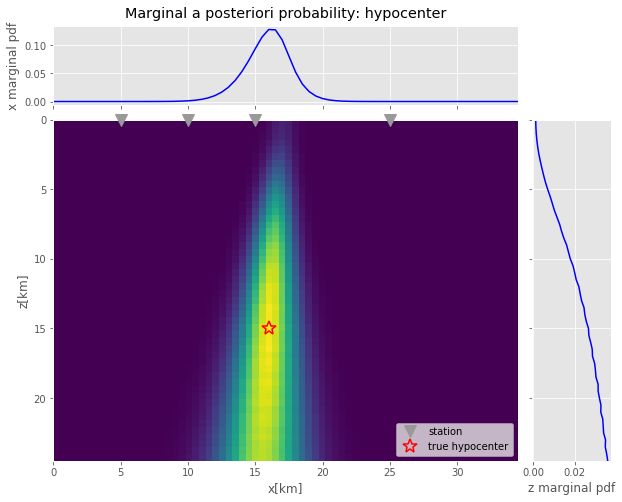

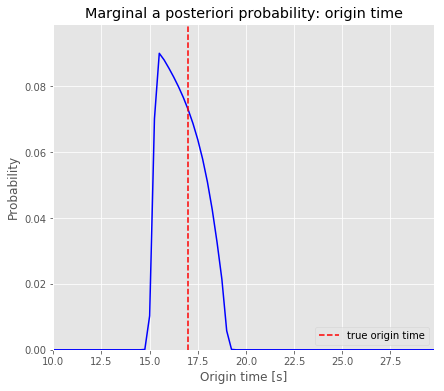

In [4]:
# Plotting the solution of the inverse problem
#----------------

#Plot 2D marginal posteriori pdf for x-z-plane
plt.rcParams['figure.figsize'] = 10,8
f1 = plt.subplot()
f1.plot(station_x, station_z, 'v', color='0.60', markersize=12, clip_on=False, zorder=10, label='station')
f1.plot(source_x, source_z,'r*', markersize=15,markerfacecolor='None',markeredgewidth=1.5,label='true hypocenter')
f1.imshow(sigMxz.transpose(), aspect='auto',extent=[space_x[0],space_x[-1],space_z[-1],space_z[0]]
          ,cmap = 'viridis', interpolation='none')
f1.set_xlabel('x[km]')
f1.set_ylabel('z[km]')
f1.legend(loc='lower right')
f1.grid()
divider = make_axes_locatable(f1)
fx = divider.append_axes("top", 1.1, pad=0.2, sharex=f1)
fz = divider.append_axes("right", 1.1, pad=0.2, sharey=f1)
fx.set_title('Marginal a posteriori probability: hypocenter',y=1.03)
fx.plot(space_x,sigMx,'b-',label='pdf')
fz.plot(sigMz,space_z,'b-')
fx.set_xlim(space_x[0],space_x[-1])
fz.set_ylim(space_z[-1],space_z[0])
fx.set_ylabel('x marginal pdf')
fz.set_xlabel('z marginal pdf')
for tl in fz.get_yticklabels():
    tl.set_visible(False)
for tl in fx.get_xticklabels():
    tl.set_visible(False)
plt.show()


#Plot marginal posteriori pdf for origin time
plt.rcParams['figure.figsize'] = 15,6
figure = plt.figure()
f2 = figure.add_subplot(121)
f2.plot(space_T, sigMT, 'b-')
f2.plot([origin_T,origin_T],[0,sigMT.max()*1.1],'r--',label='true origin time')
f2.set_xlabel('Origin time [s]')
f2.set_ylabel('Probability')
f2.set_title('Marginal a posteriori probability: origin time')
f2.set_xlim(space_T[0],space_T[-1])
f2.set_ylim(0,sigMT.max()*1.1)
f2.legend(loc='lower right')
plt.show()

## References:

* Mosegaard, K., & Tarantola, A. (2002). **Probabilistic approach to inverse problems**. International Handbook of Earthquake & Engineering Seismology, Part A., p 237-265, Academic Press, 2002.

* Tarantola, A. (2005). **Inverse problem theory and methods for model parameter estimation**. Society for Industrial and Applied Mathematics.